In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import jcamp
import peakutils
import shoyu

In [2]:
# import data dict
shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMIC ACID',
 'WATER']

In [3]:
data = shoyu_data_dict['FORMIC ACID']

array([ 120,  136,  179,  347,  480,  491,  563,  674,  912,  952,  979,
       1687, 1746, 1798, 1847, 1901, 1930, 1969, 1988])

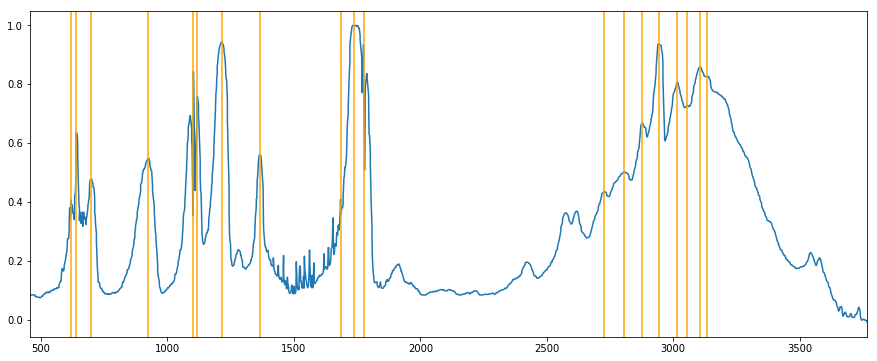

In [4]:
indexes = peakutils.indexes(data['y'], thres=0.4, min_dist=10)


plt.figure(figsize=(15,6))
plt.plot(data['x'], data['y'])
plt.xlim(min(data['x']), max(data['x']))
# plt.plot(data['x'], y2-base)

for i in indexes:
    peak_index = data['x'][i]
    plt.axvline(x=peak_index, color='orange')
indexes

In [5]:
peaks = []
for i in indexes:
    peak = (data['x'][i], data['y'][i])
    peaks.append(peak)
peaks

[(618.386807, 0.40800000000000003),
 (640.2479060000001, 0.637),
 (699.104711, 0.479),
 (924.442192, 0.5489999999999999),
 (1102.694229, 0.8428),
 (1117.828836, 0.759),
 (1215.362969, 0.944),
 (1365.027416, 0.5609999999999999),
 (1684.5357840000001, 0.40980000000000005),
 (1738.3477200000002, 1.0),
 (1775.343426, 0.9348),
 (2727.1420390000003, 0.43500000000000005),
 (2806.17832, 0.503),
 (2876.806486, 0.669),
 (2942.389782, 0.937),
 (3014.699571, 0.8069999999999999),
 (3053.3769, 0.729),
 (3107.188836, 0.8596),
 (3132.413181, 0.8280000000000001)]

In [6]:
import rampy as rp
import lmfit
from lmfit.models import LorentzianModel

In [7]:
#We can update Data during the call. If we want to pass data into the residual function, we'll need to change 
#The definition of this method I think. 
def residual(pars, x, data = None, eps = None):
    #Step one is to take the parameters that are passed and convert them into an interactable setup.
    #This should be modified to generate the same number of parameters as is passed in. 
    #It would be nicer if this could be generalized to the number of passed parameters. 
    a1 = pars['a1'].value
    a2 = pars['a2'].value
    a3 = pars['a3'].value
    a4 = pars['a4'].value
    a5 = pars['a5'].value
    
    f1 = pars['f1'].value
    f2 = pars['f2'].value
    f3 = pars['f3'].value
    f4 = pars['f4'].value
    f5 = pars['f5'].value 
    
    l1 = pars['l1'].value
    l2 = pars['l2'].value
    l3 = pars['l3'].value
    l4 = pars['l4'].value
    l5 = pars['l5'].value
    
    #OK, all Peak 1 is is a Y-Array, with the normal dist. calculated from the x value. 
    #So, we just need to calculate Peak 1 as a Y array, using the lorentzian function instead!
    
    #Initialize model to be Lorentzian Model
    mod = LorentzianModel()
    
    #Ok, now that it has been initialized, we'll use the model to calculate our functions. 
    peak1 = 
    
    # Using the Gaussian model function from rampy
    #peak1 = rp.gaussian(x,a1,f1,l1)
    #peak2 = rp.gaussian(x,a2,f2,l2)
    #peak3 = rp.gaussian(x,a3,f3,l3)
    #peak4 = rp.gaussian(x,a4,f4,l4)
    #peak5 = rp.gaussian(x,a5,f5,l5)
    
    #Instead, lets use a Lorentzian function. 
    
    model = peak1 + peak2 + peak3 + peak4 + peak5 # The global model is the sum of the Gaussian peaks
    
    if data is None: # if we don't have data, the function only returns the direct calculation
        return model, peak1, peak2, peak3, peak4, peak5
    if eps is None: # without errors, no ponderation
        #TO be clear, ponderation is weighting of the different variables. 
        return (model - data)
    return (model - data)/eps # with errors, the difference is ponderated (Again, weighted)

SyntaxError: invalid syntax (<ipython-input-7-868afd34631c>, line 32)

In [ ]:
#This method only fits a single peak, not all peaks, so the results here are weird. 
pars = mod.guess(data['y'], x = data['x'])
out = mod.fit(data['y'], pars, x = data['x'])
print(out.fit_report(min_correl=0.25))

plt.plot(data['x'], out.best_fit)

# New Exploration on Data Range

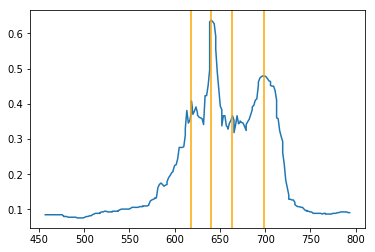

In [16]:
x = data['x'][:250]
y = data['y'][:250]
plt.plot(x, y)

indexes = peakutils.indexes(y, thres=0.25, min_dist=10)
for i in indexes:
    peak_index = x[i]
    plt.axvline(x=peak_index, color='orange')
